In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
# UPLOAD TRAIN AND TEST
import pandas as pd
import numpy as np
train = pd.read_csv("/content/drive/My Drive/Thesis/Git_repo/Data/train.csv")
train_val = pd.read_csv("/content/drive/My Drive/Thesis/Git_repo/Data/train_val.csv")
val = pd.read_csv("/content/drive/My Drive/Thesis/Git_repo/Data/validation.csv")
test = pd.read_csv("/content/drive/My Drive/Thesis/Git_repo/Data/test.csv") # equal for all the models
test_fastai = test[["userID","movieID"]]
print("Train shape ", train.shape)
print("Validation shape ", val.shape)
print("Test shape ", test.shape)

Train shape  (640303, 3)
Validation shape  (159799, 3)
Test shape  (199898, 3)


## MLP FASTAI

In [4]:
import fastai
print(fastai.__version__)
from fastai import *
from fastai.collab import *
from fastai.callbacks import *
import math
%matplotlib inline
import matplotlib.pyplot as plt

os.chdir('/content/drive/My Drive/Thesis/Git_repo') # select position of repo
from utils_fastai.fastai_functions import MLP_fastai_factors,MLP_fastai_layers

1.0.61


In [0]:
latent_factors = [20,30,40,50,60,70,80,90,100]

In [6]:
result_MLP_fastai_factors = MLP_fastai_factors(train_val = train_val ,n_batch_sizes = 256 ,lr = 0.0005 ,nr_epochs = 2,
                            layers = [256,128,64],latent_factors = latent_factors)

epoch,train_loss,valid_loss,time
0,1.044485,1.032822,00:44
1,0.895604,1.021009,00:44


epoch,train_loss,valid_loss,time
0,1.027831,1.035886,00:44
1,0.862833,1.028530,00:44


epoch,train_loss,valid_loss,time
0,1.026310,1.033531,00:43
1,0.878211,1.029480,00:45


epoch,train_loss,valid_loss,time
0,1.022474,1.031009,00:44
1,0.840790,1.033640,00:44


epoch,train_loss,valid_loss,time
0,1.036695,1.025311,00:44
1,0.841136,1.034206,00:44


epoch,train_loss,valid_loss,time
0,1.028980,1.024366,00:45
1,0.823096,1.034331,00:44


epoch,train_loss,valid_loss,time
0,1.019764,1.029302,00:44
1,0.823540,1.036029,00:44


epoch,train_loss,valid_loss,time
0,1.025632,1.022641,00:44
1,0.820390,1.039230,00:46


epoch,train_loss,valid_loss,time
0,1.023230,1.023518,00:47
1,0.813431,1.045309,00:47


In [7]:
result_MLP_fastai_factors

([1.0104501200902645,
  1.0141645053996178,
  1.0146329289298421,
  1.0166810633989758,
  1.0169593262129857,
  1.0170204552812945,
  1.0178552641887106,
  1.0194264208222181,
  1.0224034567399907],
 [20, 30, 40, 50, 60, 70, 80, 90, 100])

In [0]:
np.save("/content/drive/My Drive/Thesis/Git_repo/Data/result_MLP_fastai_factors",result_MLP_fastai_factors)

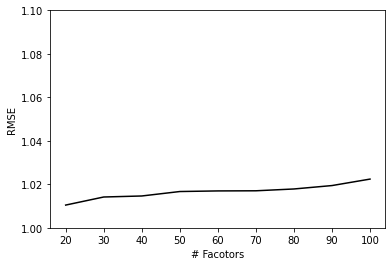

In [9]:
rmse_MLP_factors = result_MLP_fastai_factors[0]
MLP_n_factors = result_MLP_fastai_factors[1]

plt.ylim(1, 1.1)
plt.xlabel('# Facotors')
plt.ylabel('RMSE')
plt.plot(MLP_n_factors, rmse_MLP_factors, c = "black")

In [0]:
layers = [[8],
          [16,8],
          [32,16,8],
          [64,32,16,8],
          [128,64,32,16,8],
          [256,128,64,32,16,8],
          [512,256,128,64,32,16,8]]

In [12]:
result_MLP_fastai_layers = MLP_fastai_layers(train_val = train_val ,n_batch_sizes = 256 ,lr = 0.0005
                           ,nr_epochs = 2, layers = layers ,latent_factors = 10)

epoch,train_loss,valid_loss,time
0,1.008624,1.005963,00:42
1,0.831537,1.024487,00:42


epoch,train_loss,valid_loss,time
0,1.022637,1.018217,00:43
1,0.867086,1.030573,00:44


epoch,train_loss,valid_loss,time
0,1.036437,1.033753,00:44
1,0.907125,1.031248,00:44


epoch,train_loss,valid_loss,time
0,1.063429,1.047467,00:45
1,0.947462,1.031071,00:45


epoch,train_loss,valid_loss,time
0,1.043483,1.043466,00:47
1,0.936192,1.023810,00:47


epoch,train_loss,valid_loss,time
0,1.032918,1.048373,00:48
1,0.949796,1.022875,00:49


epoch,train_loss,valid_loss,time
0,1.049382,1.043924,00:50
1,0.947161,1.015959,00:51


In [13]:
result_MLP_fastai_layers

([1.012169461397253,
  1.0151715953830218,
  1.01550380277086,
  1.0154165787684408,
  1.0118349222183214,
  1.0113726874619617,
  1.0079476909007545],
 [1, 2, 3, 4, 5, 6, 7])

In [0]:
np.save("/content/drive/My Drive/Thesis/Git_repo/Data/result_MLP_fastai_layers",result_MLP_fastai_layers)

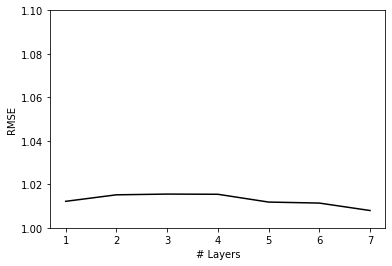

In [15]:
MLP_rmse_layers = result_MLP_fastai_layers[0]
MLP_n_layers = result_MLP_fastai_layers[1]

plt.ylim(1, 1.1)
plt.xlabel('# Layers')
plt.ylabel('RMSE')
plt.plot(MLP_n_layers, MLP_rmse_layers, c = "black")

## NMF

In [16]:
import os
os.chdir('/content/drive/My Drive/Thesis/Git_repo') # select position of repo
from Models.nmf_models import NMF_factors, NMF_layers
from tensorflow.keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from sklearn.metrics import mean_squared_error
from math import sqrt

%matplotlib inline
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [0]:
latent_factors = [20,30,40,50,60,70,80,90,100]

In [19]:
result_NMF_factors = NMF_factors(train = train ,val = val ,n_batch_sizes = 256,
                     lr = 0.0001, nr_epochs = 10 ,layers = [256,128,64],n_factors = latent_factors )

fit n_latent factor ---->  20


/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Epoch 00005: early stopping
fit n_latent factor ---->  30
Epoch 00005: early stopping
fit n_latent factor ---->  40
Epoch 00005: early stopping
fit n_latent factor ---->  50
Epoch 00005: early stopping
fit n_latent factor ---->  60
Epoch 00006: early stopping
fit n_latent factor ---->  70
Epoch 00005: early stopping
fit n_latent factor ---->  80
Epoch 00005: early stopping
fit n_latent factor ---->  90
Epoch 00005: early stopping
fit n_latent factor ---->  100
Epoch 00005: early stopping


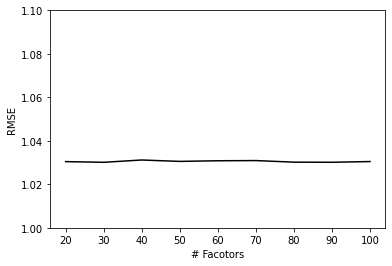

In [20]:
NMF_rmse_factors = result_NMF_factors[0]
NMF_n_factors = result_NMF_factors[1]

plt.ylim(1, 1.1)
plt.xlabel('# Facotors')
plt.ylabel('RMSE')
plt.plot(NMF_n_factors, NMF_rmse_factors, c = "black")

In [0]:
np.save("/content/drive/My Drive/Thesis/Git_repo/Data/result_NMF_factors",result_NMF_factors)

In [0]:
layers = [[8],
          [16,8],
          [32,16,8],
          [64,32,16,8],
          [128,64,32,16,8],
          [256,128,64,32,16,8],
          [512,256,128,64,32,16,8]]

In [23]:
resutl_NMF_layers = NMF_layers(train = train ,val = val ,n_batch_sizes = 256,
                     lr = 0.0001, nr_epochs = 10 ,layers = layers)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 640303 samples, validate on 159799 samples
Epoch 1/10
640303/640303 [==============================] - 13s 20us/step - loss: 8.9725 - val_loss: 2.3141
Epoch 2/10
640303/640303 [==============================] - 13s 20us/step - loss: 1.5779 - val_loss: 1.2841
Epoch 3/10
640303/640303 [==============================] - 13s 20us/step - loss: 1.1791 - val_loss: 1.1307
Epoch 4/10
640303/640303 [==============================] - 13s 20us/step - loss: 1.0967 - val_loss: 1.0980
Epoch 5/10
640303/640303 [==============================] - 13s 20us/step - loss: 1.0652 - val_loss: 1.0828
Epoch 6/10
640303/640303 [==============================] - 13s 20us/step - loss: 1.0411 - val_loss: 1.0741
Epoch 7/10
640303/640303 [==============================] - 13s 20us/step - loss: 1.0223 - val_loss: 1.0693
Epoch 8/10
640303/640303 [==============================] - 13s 20us/step - loss: 1.0085 - val_loss: 1.0676
Epoch 9/10
640303/640303 [==============================] - 13s 20us/step - loss: 0.

In [0]:
np.save("/content/drive/My Drive/Thesis/Git_repo/Data/resutl_NMF_layers",resutl_NMF_layers)

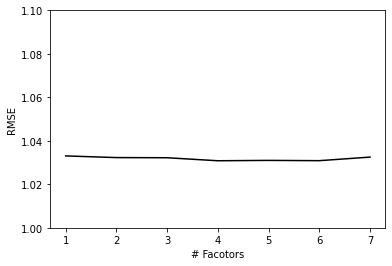

In [25]:
NMF_rmse_layers = resutl_NMF_layers[0]
NMF_n_layers = resutl_NMF_layers[1]

plt.ylim(1, 1.1)
plt.xlabel('# Facotors')
plt.ylabel('RMSE')
plt.plot(NMF_n_layers, NMF_rmse_layers, c = "black")

## RESULTS 

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt

In [0]:
import numpy as np
MLP_factors = np.load("/content/drive/My Drive/Thesis/Git_repo/Data/result_MLP_fastai_factors.npy")
NMF_factors = np.load("/content/drive/My Drive/Thesis/Git_repo/Data/result_NMF_factors.npy")

MLP_layers = np.load("/content/drive/My Drive/Thesis/Git_repo/Data/result_MLP_fastai_layers.npy")
NMF_layers = np.load("/content/drive/My Drive/Thesis/Git_repo/Data/resutl_NMF_layers.npy")

In [0]:
MLP_factors_rmse = MLP_factors[0]
NMF_factors_rmse = NMF_factors[0]
number_factors = MLP_factors[1].astype('int64')

MLP_layers_rmse = MLP_layers[0]
NMF_layers_rmse = NMF_layers [0]
number_layers = NMF_layers[1].astype("int64")

In [20]:
MLP_layers_rmse

array([1.01216946, 1.0151716 , 1.0155038 , 1.01541658, 1.01183492,
       1.01137269, 1.00794769])

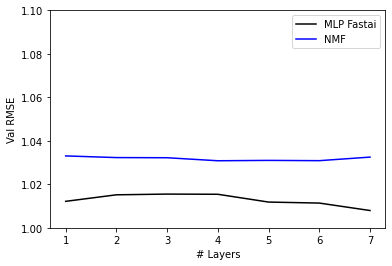

In [14]:
plt.ylim(1, 1.1)
plt.xlabel('# Layers')
plt.ylabel('Val RMSE')
plt.plot(number_layers, MLP_layers_rmse, c = "black", label = "MLP Fastai")
plt.plot(number_layers, NMF_layers_rmse, c = "blue", label = "NMF")
plt.legend(loc="upper right")
plt.savefig("/content/drive/My Drive/Thesis/Git_repo/images/number_layers.pdf")

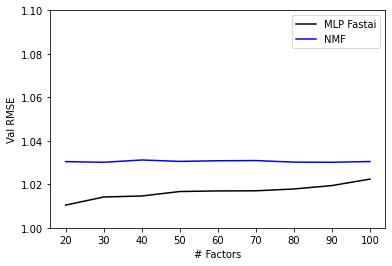

In [15]:
plt.ylim(1, 1.1)
plt.xlabel('# Factors')
plt.ylabel('Val RMSE')
plt.plot(number_factors, MLP_factors_rmse, c = "black", label = "MLP Fastai")
plt.plot(number_factors, NMF_factors_rmse, c = "blue", label = "NMF")
plt.legend(loc="upper right")
plt.savefig("/content/drive/My Drive/Thesis/Git_repo/images/number_factors.pdf")

## RMSE on test set

In [3]:
import fastai
print(fastai.__version__)
from fastai import *
from fastai.collab import *
from fastai.callbacks import *
import math

1.0.61


In [4]:
# train the model with 7 layers
data = CollabDataBunch.from_df(train_val, valid_pct=0.2, test=test_fastai,seed=2, bs=256)
learn = collab_learner(data, use_nn=True, emb_szs={'userID': 10, 'movieID':10}, layers= [512,256,128,64,32,16,8], y_range=[1, 5])
learn.fit_one_cycle(2,0.0005)

epoch,train_loss,valid_loss,time
0,1.052269,1.052554,01:24
1,0.952424,1.026279,01:24


In [5]:
# RMSE on test set
from sklearn.metrics import mean_squared_error
from math import sqrt
pred_fastai = learn.get_preds(DatasetType.Test)
sqrt(mean_squared_error(test["rating"].values,pred_fastai[0]))

1.0092272344357351